123


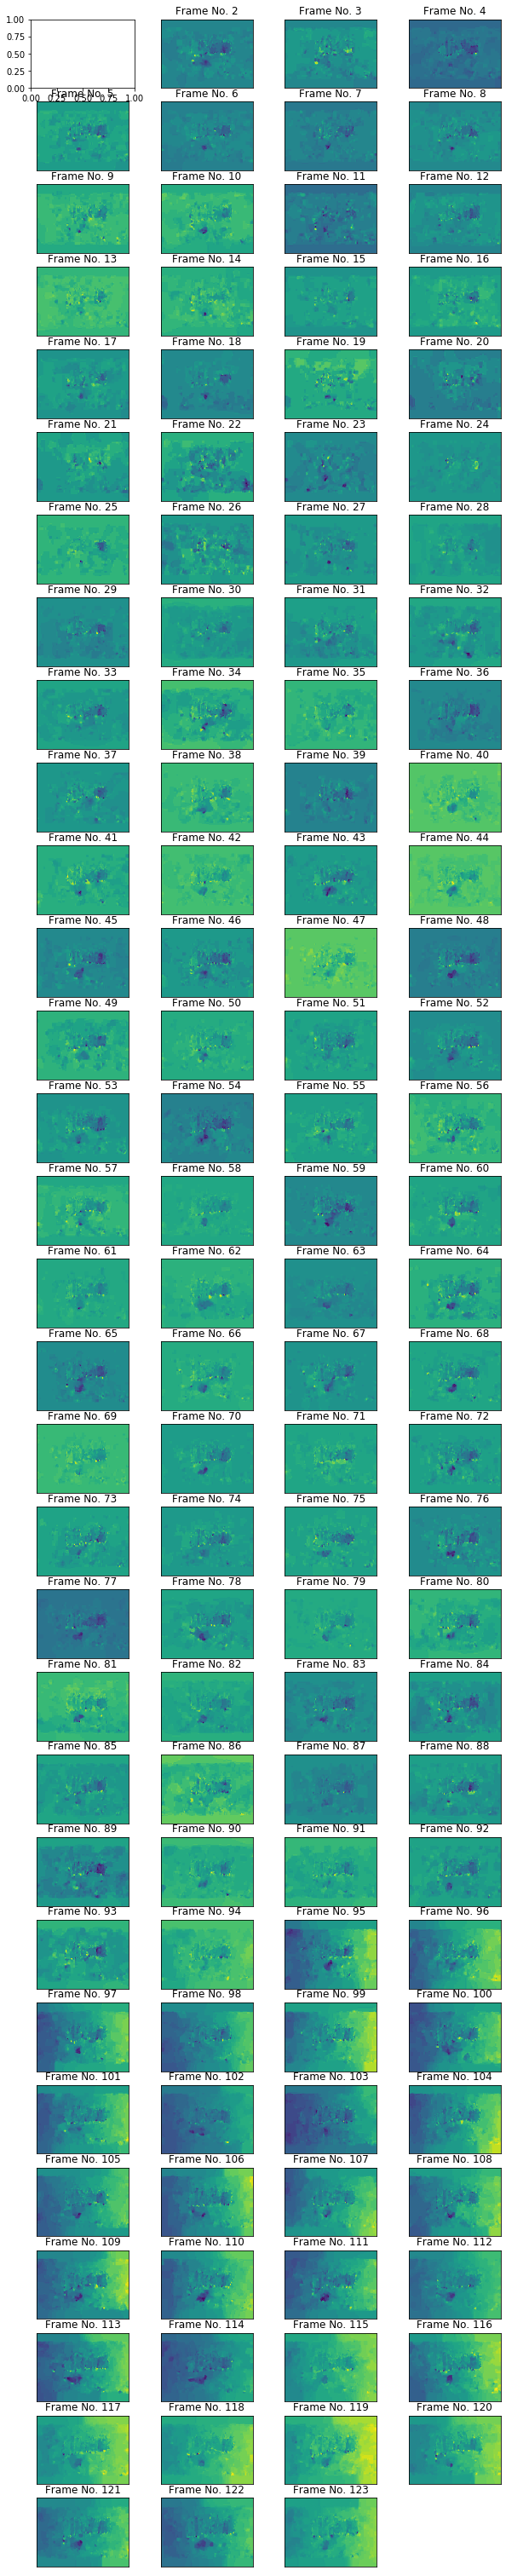

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import h5py
import cv2

videoname = 'Waterfall_moving_cam_1'

filename = '/media/wan305/Elements/hdf5_opt_rgb_feature_dataset/yup_rgb_u_v.hdf5'
f = h5py.File(filename, 'r')
count = f['u/' + videoname + '/count'][()]
print(count)
plt.figure(figsize=(10,55))

for ii in range(count):
    plt.subplot(31, 4, ii+1)
    
    frame = f['u/' + videoname + '/frame' + str(ii + 2).zfill(6)][:]
    # print(frame.shape)
    im = cv2.imdecode(frame, cv2.IMREAD_GRAYSCALE)
    # print(im.shape)
    # print('--------')
    # print(im)
    if ii == 0:
        continue
    plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.title('Frame No. {}'.format(ii+1))
f.close()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [109.0, 202.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [83.0, 187.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [111.0, 197.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [115.0, 193.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [114.0, 194.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [94.0, 207.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [89.0, 202.0]. Convert image to uint8 prior to saving to suppress this warn

Lossy conversion from float64 to uint8. Range [114.0, 206.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [113.0, 203.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [117.0, 206.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [113.0, 201.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [106.0, 205.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [103.0, 201.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [117.0, 207.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [117.0, 203.0]. Convert image to uint8 prior to saving to suppres

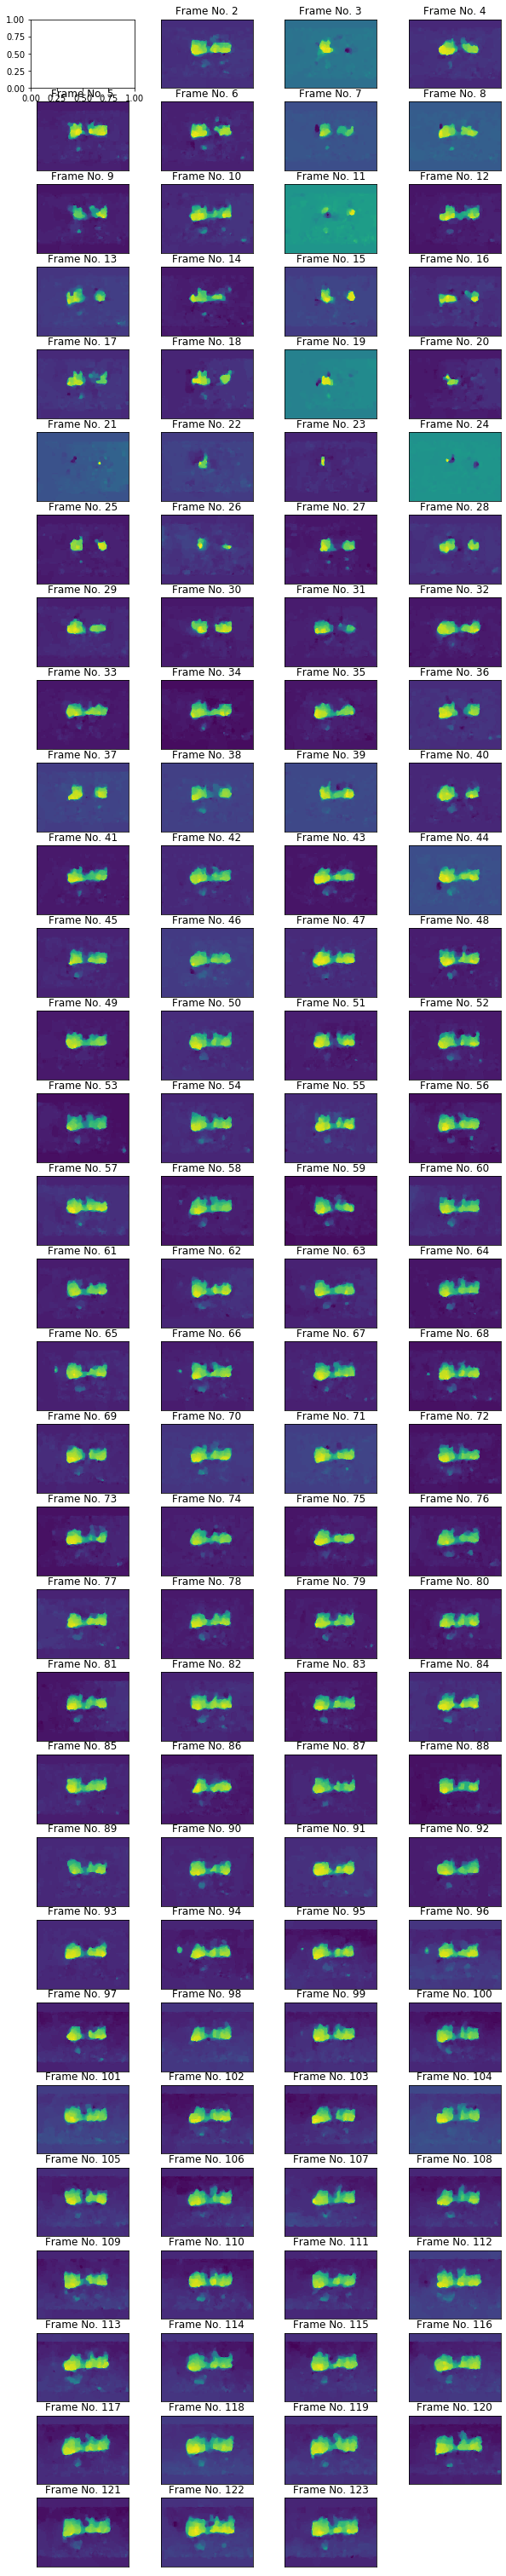

In [2]:
import numpy as np
import imageio
from skimage import io
import os

f = h5py.File(filename, 'r')
count = f['u/' + videoname + '/count'][()]
plt.figure(figsize=(10,55))

video = np.zeros((count, 256, 342))
for ii in range(count):
    plt.subplot(31, 4, ii+1)
    
    frame = f['v/' + videoname + '/frame' + str(ii + 2).zfill(6)][:]
    # print(frame.shape)
    im = cv2.imdecode(frame, cv2.IMREAD_GRAYSCALE)
    # print(im.shape)
    # print('--------')
    # print(im)
    if ii == 0:
        continue
    video[ii, :, :] = im
    plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.title('Frame No. {}'.format(ii+1))
f.close()
kargs = {'fps':30, 'macro_block_size': None}
imageio.mimwrite('ldof_v_waterfall.mp4', video, **kargs)